#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import six
import pandas as pd
import numpy as np
from skeleton.utils import pystr


#### Load datasets 

In [2]:
boston = (
    pd.read_csv("../datasets/boston_housing.csv")
    .assign(
        total_sqm = lambda df: (df["1stFlrSF"] + df["2ndFlrSF"])*0.093,
        ppsqm = lambda df: df.SalePrice /   df.total_sqm 
        )
    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 83 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ MSSubClass        : int64        60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20, 20, 45, 20, 90, 20...
$ MSZoning          : str          "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "RL", "RL", "RL", "RL...
$ LotFrontage       : float64      65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 85.0, nan,...
$ LotArea           : int64        8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 119...
$ Street            : str          "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pa...
$ Alley             : str          "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan"...
$ LotShape          : str          "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", "Reg", "Reg", "Reg"...
$ LandContour       : str          "Lvl", "Lv

#### Plots

In [3]:
from skeleton.plots.barplots import plot_percentage_per_subcategory

primary='Neighborhood'
secondary='Stars'
 
popular_neighborhoods = boston.groupby('Neighborhood').Id.count() #.index
popular_neighborhoods = popular_neighborhoods[popular_neighborhoods > 80].index

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(Stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 

    
plot_percentage_per_subcategory(df,primary,secondary);

ModuleNotFoundError: No module named 'skeleton.plots.barplots'

Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


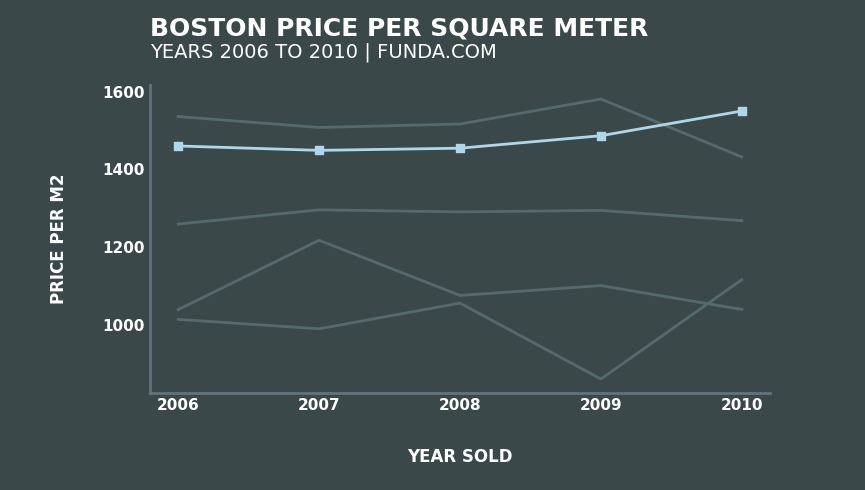

In [5]:
from skeleton.plots.scatter import plot

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 

(
    plot(df,"YrSold","ppsqm", style = "vox")
    .set_ylabel("PRICE PER M2")
    .set_xlabel("YEAR SOLD")
    .set_title("BOSTON PRICE PER SQUARE METER")
    .set_subtitle("YEARS 2006 TO 2010 | FUNDA.COM")
    .color_by("Neighborhood")
    .focus_on("CollgCr")
    .set_figsize(8,4)
    .set_yticks(np.arange(1000, 1800, 200))
    .set_xticks(np.arange(2006, 2011))

    .show()
)


Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


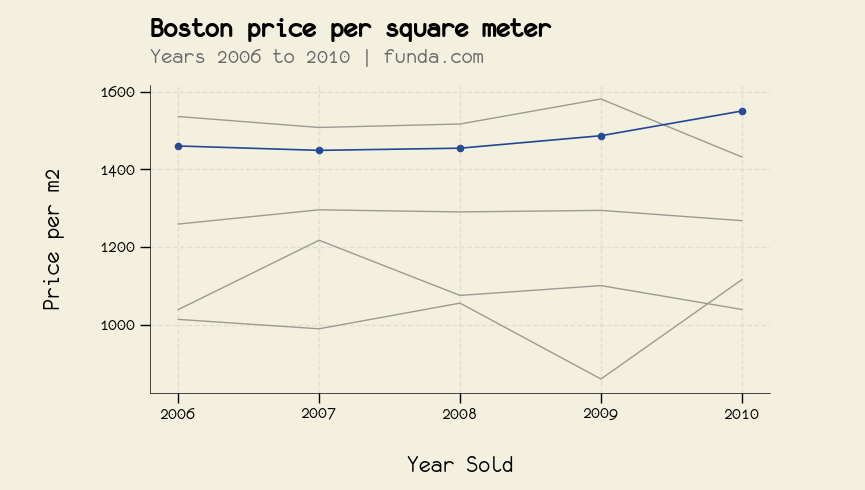

In [58]:
from skeleton.plots.scatter import plot

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 

(
    plot(df,"YrSold","ppsqm", style = "innocent")
    .set_ylabel("Price per m2")
    .set_xlabel("Year Sold")
    .set_title("Boston price per square meter")
    .set_subtitle("Years 2006 to 2010 | funda.com")
    .color_by("Neighborhood")
    .focus_on("CollgCr")
    .set_figsize(8,4)
    .set_yticks(np.arange(1000, 1800, 200))
    .set_xticks(np.arange(2006, 2011))
    .show()
)


Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


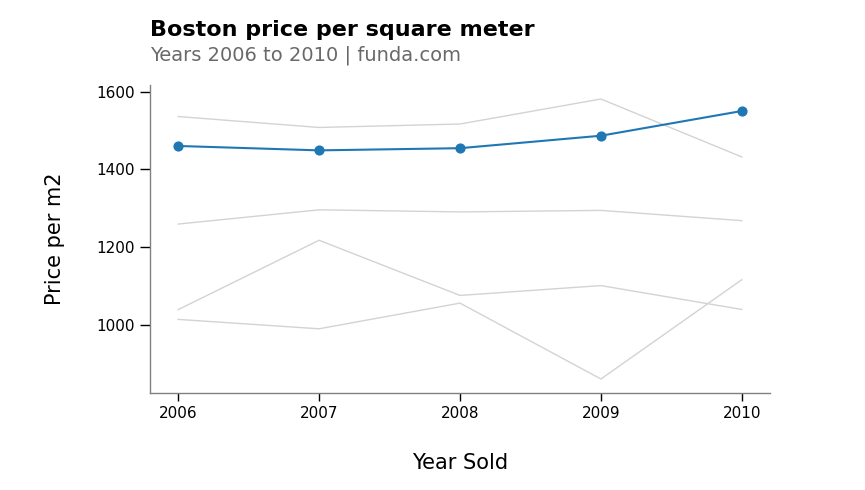

In [76]:
from skeleton.plots.scatter import plot

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 

(
    plot(df,"YrSold","ppsqm", style = "base")
    .set_ylabel("Price per m2")
    .set_xlabel("Year Sold")
    .set_title("Boston price per square meter")
    .set_subtitle("Years 2006 to 2010 | funda.com")
    .color_by("Neighborhood")
    .focus_on("CollgCr")
    .set_figsize(8,4)
    .set_yticks(np.arange(1000, 1800, 200))
    .set_xticks(np.arange(2006, 2011))
    .show()
)


In [38]:
import matplotlib.pyplot as plt
plt.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':